# High frequency variabilities

In [53]:
%load_ext ferretmagic

The ferretmagic extension is already loaded. To reload it, use:
  %reload_ext ferretmagic


### Literature : Waves, Tides and Shallow water Processes by Open university
![aviso sea level](Images/HighFreq.png)

### Location of Kakinada tide gauge 

! Enter_GO basemap x=75:95 Y=7:24n 5
! Exit_GO


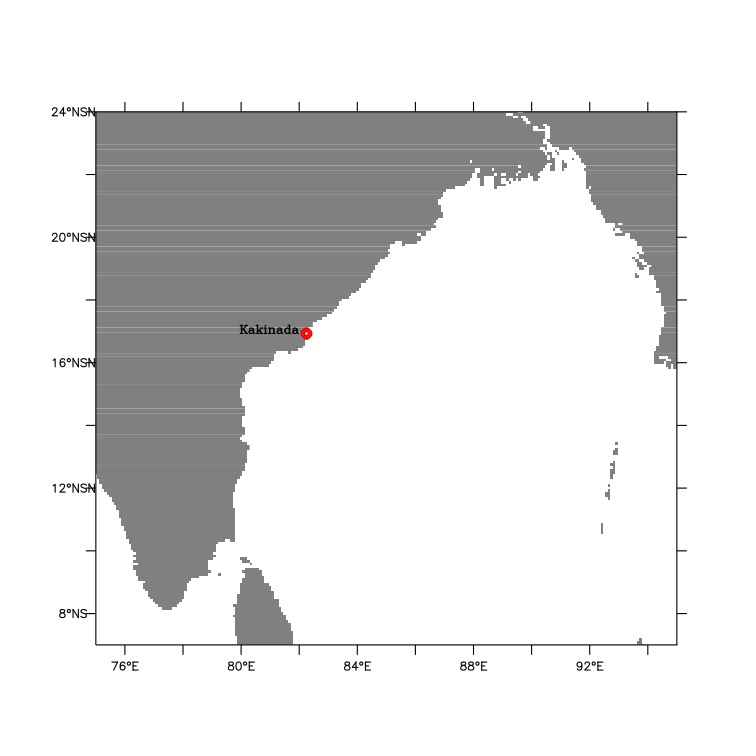

In [54]:
%%ferret
set win/as=1
GO basemap x=75:95 Y=7:24n 5

let TG_lon = {82.250}
let TG_lat = {16.933}
plot/over/sym=28/vs/thick/color=red/nolab TG_lon,TG_lat
plot/over/sym=27/vs/thick/color=red/nolab TG_lon,TG_lat

label `TG_lon[i=5]-0.25`,`TG_lat[i=5]`,1,0,.1 @CRKakinada


### Plot the hourly time series 


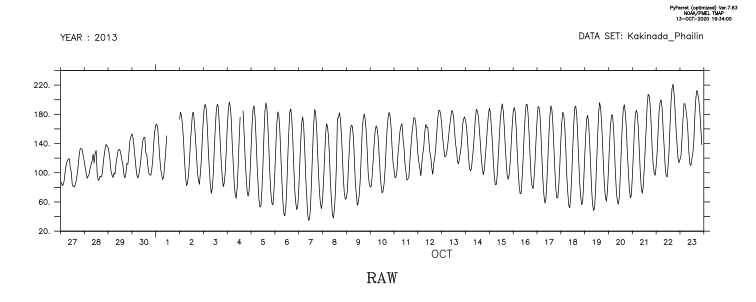

In [84]:
%%ferret
use DATA/TG/Cylone/Kakinada_Phailin.nc
set win/asp=0.4
plot raw

### Frequency Spectrum of Kakinada


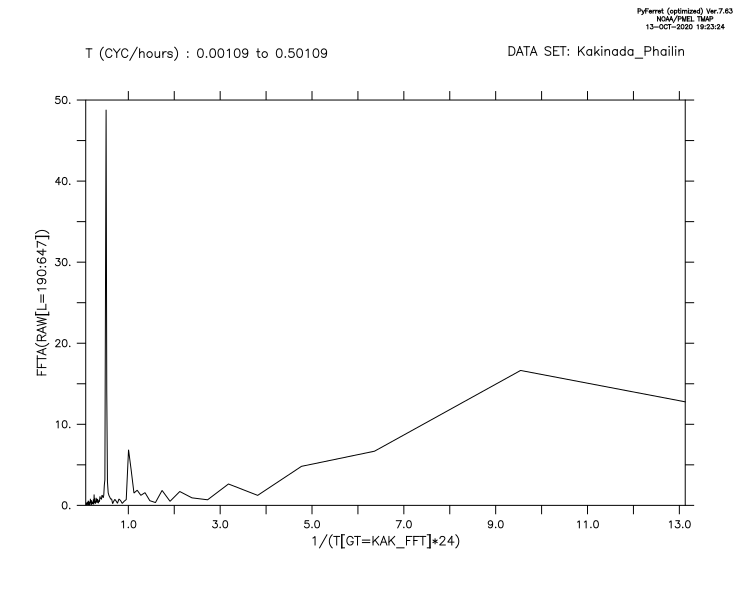

In [81]:
%%ferret
let Kak_fft = ffta(raw[l=190:647])  ;  let K_Hr = 1/(t[gt=Kak_fft]*24)
!let Kaks_fft = ffta(sla[l=290:647]) ;  let Ks_Hr = 1/(t[gt=Kaks_fft]*24)
set win/asp=0.8

plot/vs/line/color=black/hlimi=0.2:13  K_Hr,Kak_fft
   ! plot/vs/line/color=red/hlimi=0.2:3/over Ks_Hr,Kaks_fft

### zoom the spectrum


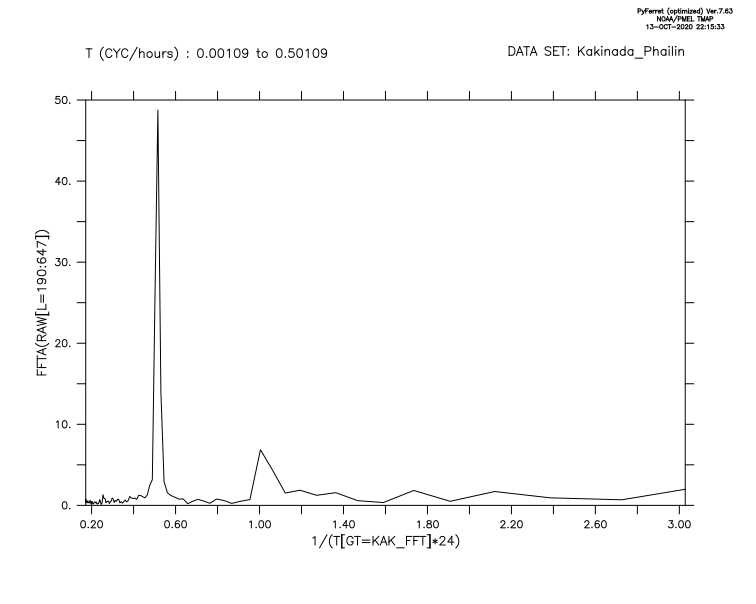

In [94]:
%%ferret
set win/asp=0.8

plot/vs/line/color=black/hlimi=0.2:3  K_Hr,Kak_fft

### TIDAL ANALYSIS BY HARMONIC METHOD

In [ ]:
#%%bash
#cd Codes/
#gfortran tira.f
#./a.out

In [ ]:
%%ferret
set win/asp=.4
pl/t=27-Sep-2013:20-Oct-2013 raw,sla


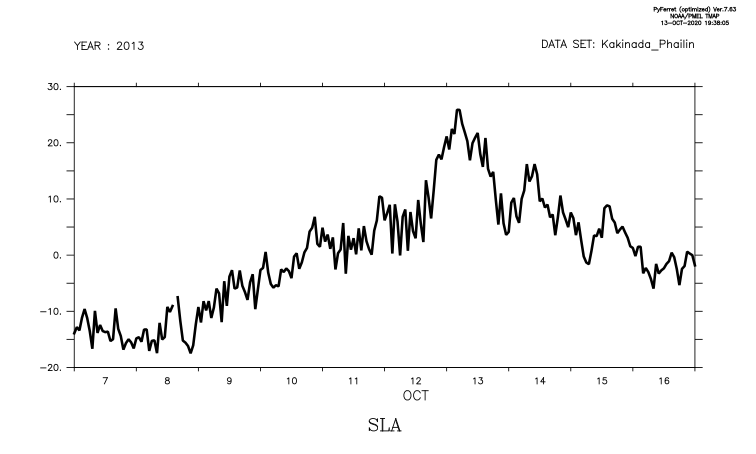

In [92]:
%%ferret
set win/asp=.6
pl/t=07-oct-2013:17-oct-2013/thick=3 sla